# Exploratory Data Analysis

In [1]:
# import the necessary libraries 

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# system 
import os 

# warning 
import warnings 

# computer vision
import cv2

# random lib
import random

# pillow 
from PIL import Image

warnings.filterwarnings('ignore')

dataPath = "D:\Datasets\Embryo Datasets"

#### Image Count & Class Distribution

In [2]:
# 8 cell dataset count 

cellDatasetLength = 0

for grade in ["Grade A", "Grade B", "Grade C"]:
    cellDatasetLength = cellDatasetLength + len(os.listdir(os.path.join(dataPath, "8-cell", grade)))
    print(f'{grade} dataset count is  {len(os.listdir(os.path.join(dataPath, "8-cell", grade)))}\n')

print("Total dataset length is", cellDatasetLength, "for 8 cell grade")

Grade A dataset count is  190

Grade B dataset count is  179

Grade C dataset count is  150

Total dataset length is 519 for 8 cell grade


In [3]:
# morula dataset count 

morulaDatasetLength = 0

for grade in ["Grade A", "Grade B", "Grade C"]:
    morulaDatasetLength = morulaDatasetLength + len(os.listdir(os.path.join(dataPath, "morula", grade)))
    print(f'{grade} dataset count is  {len(os.listdir(os.path.join(dataPath, "8-cell", grade)))}\n')

print("Total dataset length is", morulaDatasetLength, "for morula grade")

Grade A dataset count is  190

Grade B dataset count is  179

Grade C dataset count is  150

Total dataset length is 434 for morula grade


In [4]:
# Blastocyst dataset count 

blastocystDatasetLength = 0

for grade in ["Grade A", "Grade B", "Grade C"]:
    blastocystDatasetLength = blastocystDatasetLength + len(os.listdir(os.path.join(dataPath, "Blastocyst", grade)))
    print(f'{grade} dataset count is  {len(os.listdir(os.path.join(dataPath, "Blastocyst", grade)))}\n')

print("Total dataset length is", blastocystDatasetLength, "for Blastocyst grade")

Grade A dataset count is  148

Grade B dataset count is  152

Grade C dataset count is  150

Total dataset length is 450 for Blastocyst grade


In [5]:
# Error images 

errorImages = len(os.listdir(os.path.join(dataPath, "Error Images")))

f'Total error images is {errorImages}'

'Total error images is 268'

In [6]:
# Total Dataset 

cellDatasetLength + morulaDatasetLength + blastocystDatasetLength + errorImages

1671

####  Random Image Visualization

In [8]:
def VisualImages(stage):
    # 🔤 Grade folders
    grades = ['Grade A', 'Grade B', 'Grade C']
    base_path = r"D:\Datasets\Embryo Datasets"
    base_path = os.path.join(base_path, stage)
    # 🖼️ Plot setup
    plt.figure(figsize=(15, 9))

    for row, grade in enumerate(grades):
        folder_path = os.path.join(base_path, grade)
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
        
        # 🎲 Pick 5 random images
        random_images = random.sample(image_files, 5)
        
        for col, img_name in enumerate(random_images):
            img_path = os.path.join(folder_path, img_name)
            img = load_img(img_path)
            
            plt.subplot(3, 5, row * 5 + col + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{grade}")

    plt.tight_layout()
    plt.show()

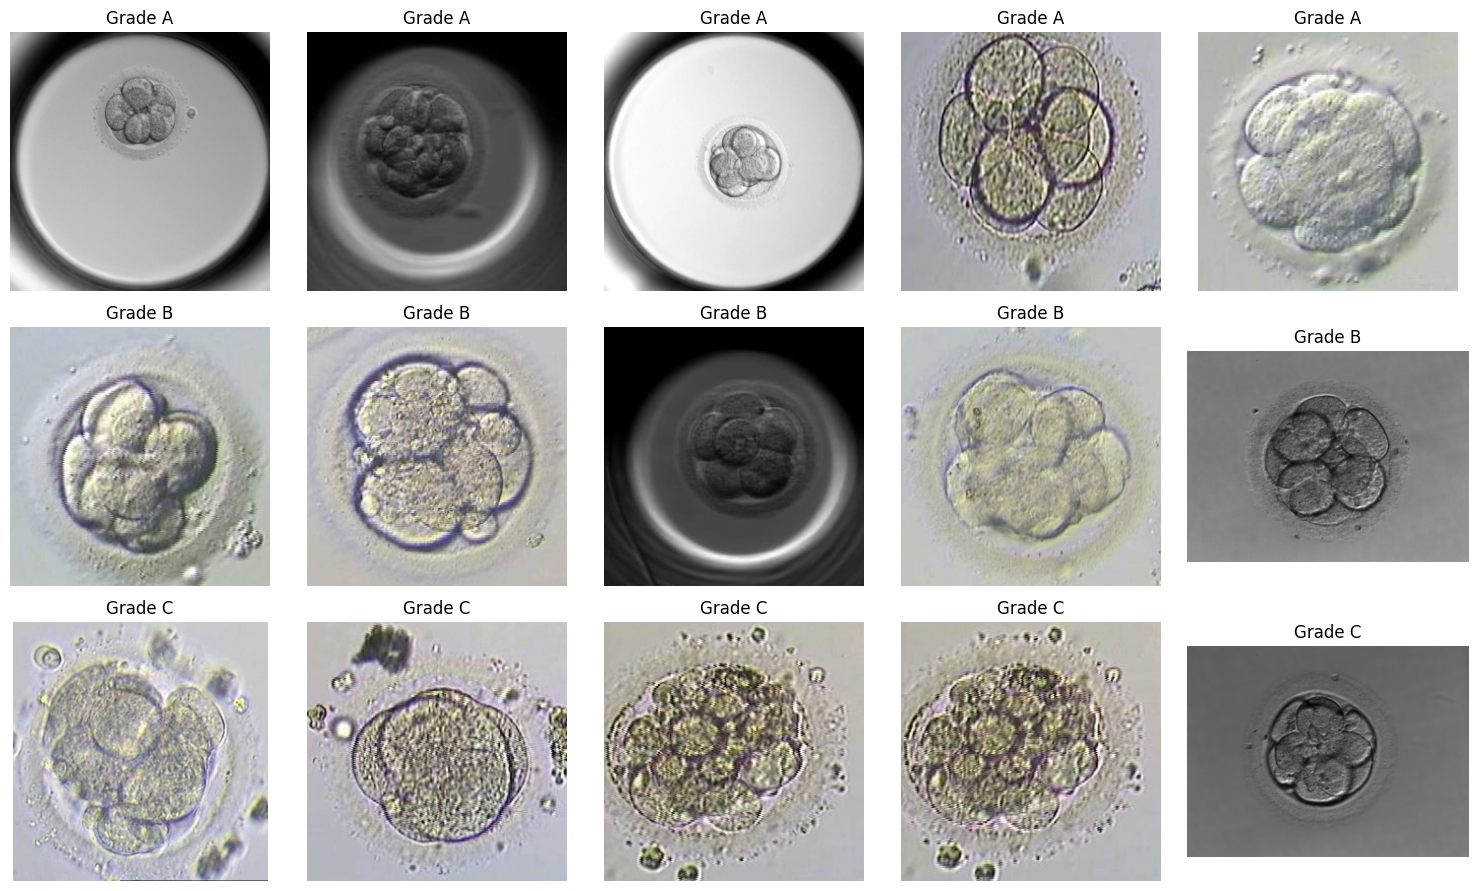

In [8]:
# 8 cell stage 

VisualImages("8-cell")

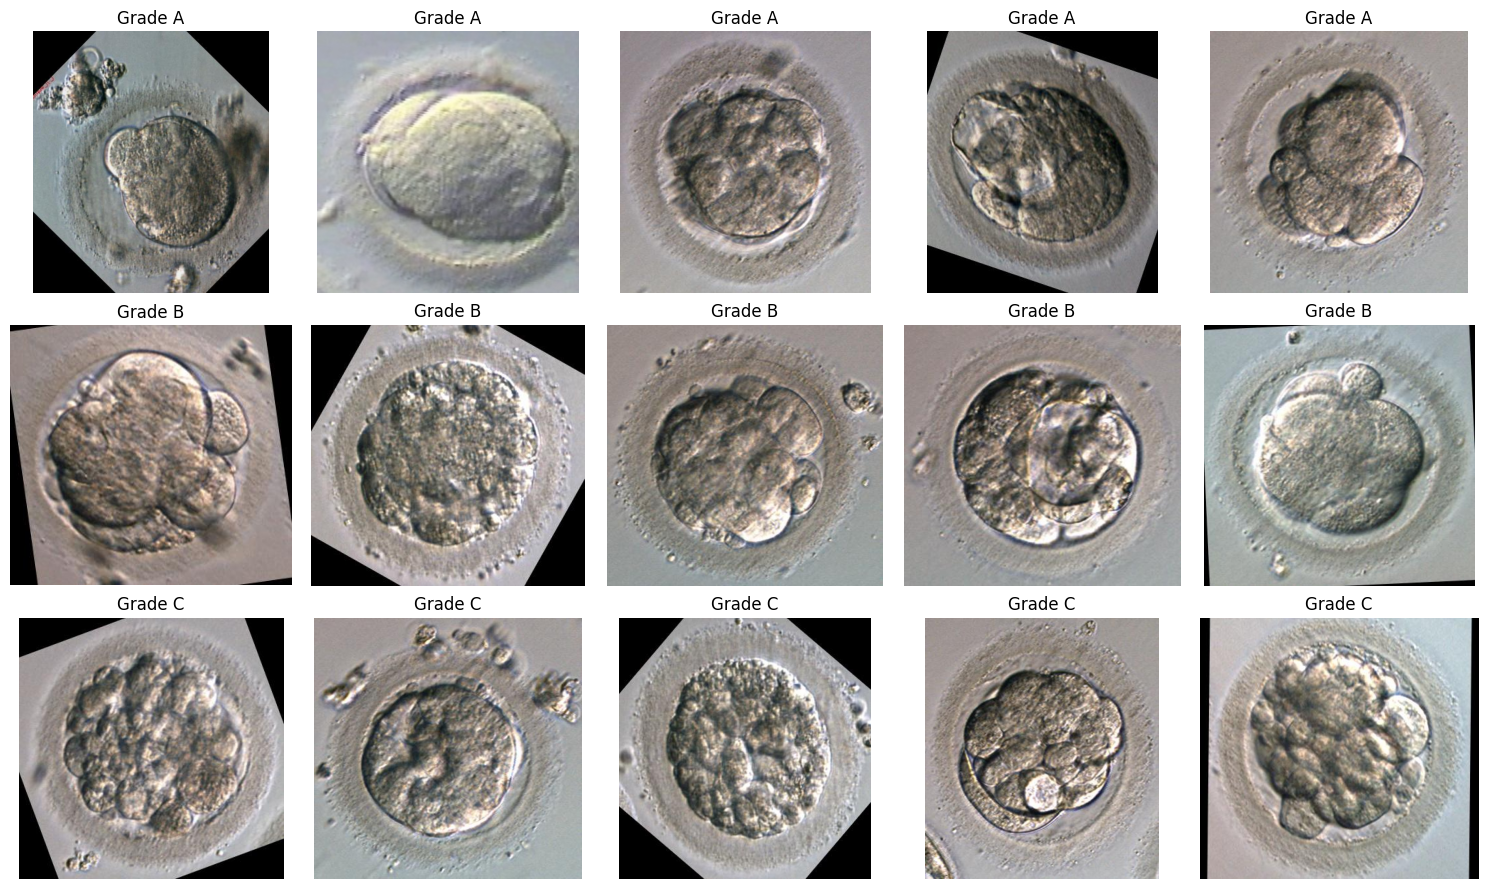

In [9]:
# Morula stage 

VisualImages("Morula")

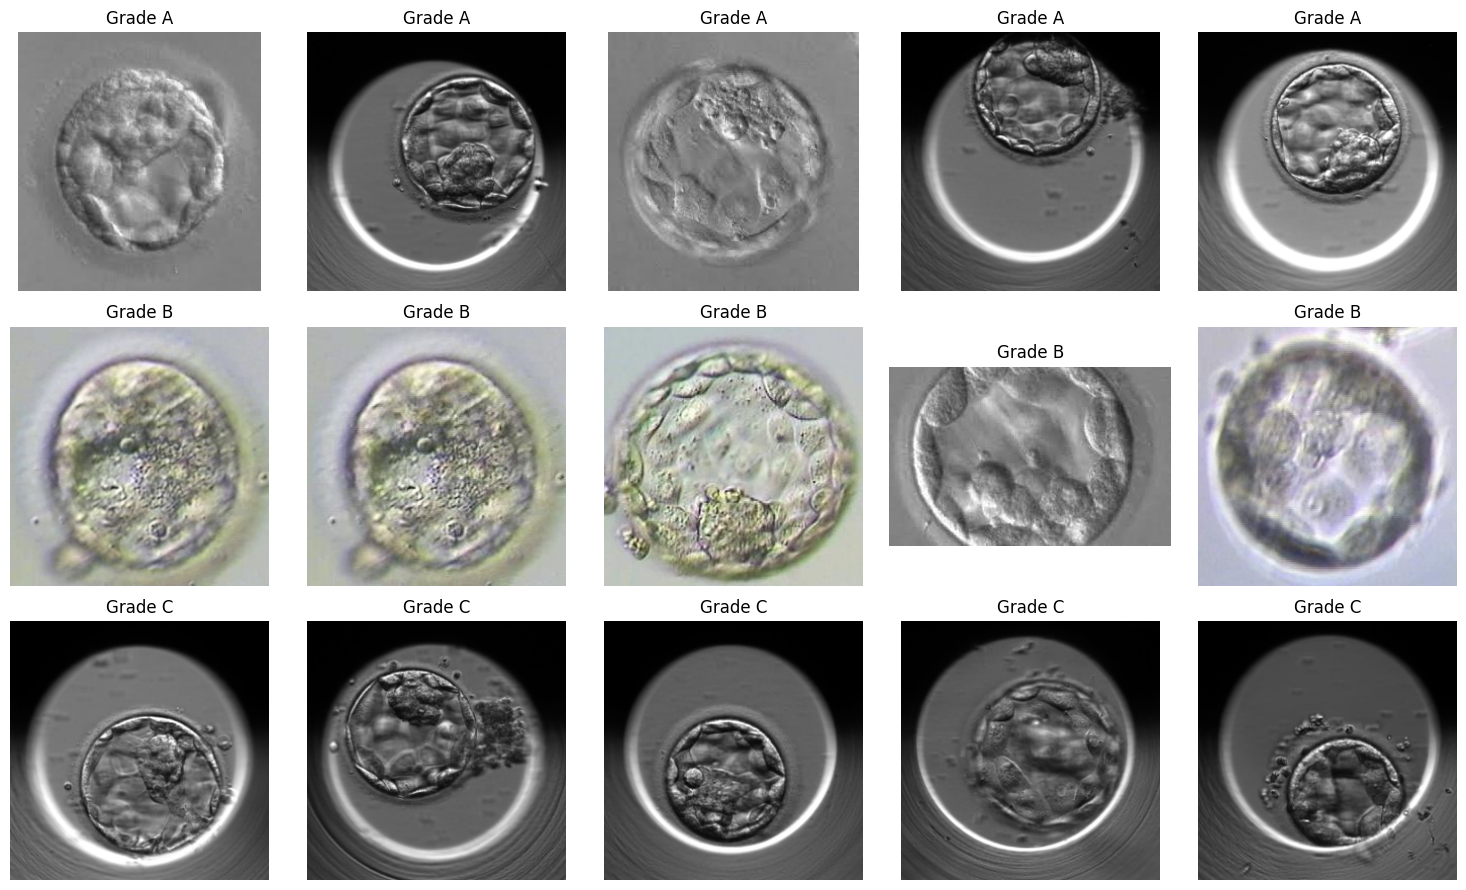

In [10]:
# Blastocyst stage 

VisualImages("Blastocyst")

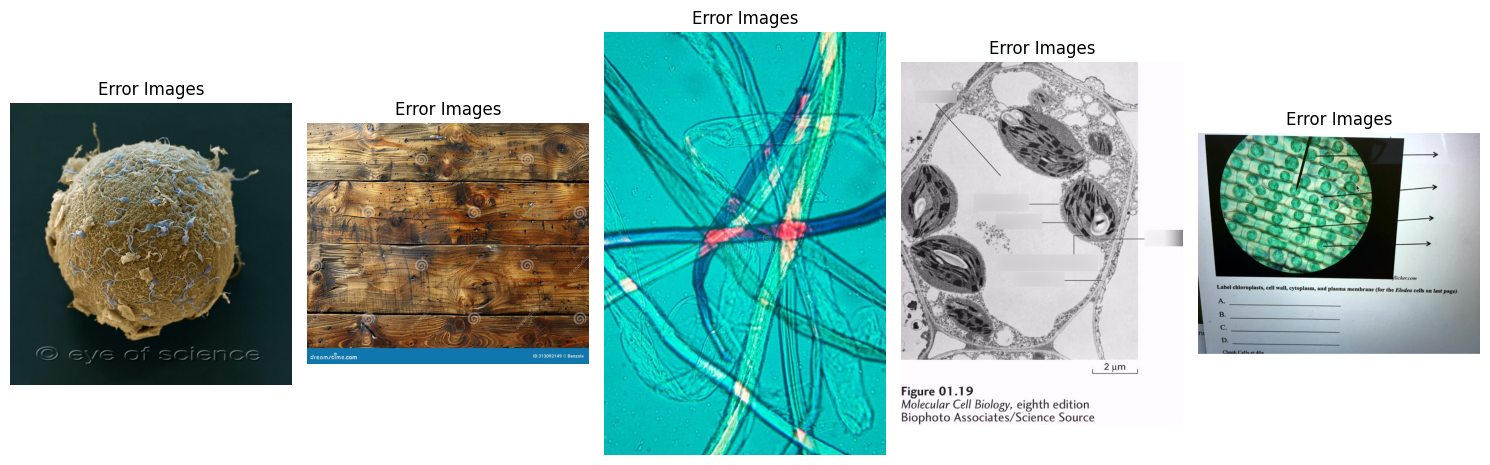

In [11]:
# ErrorImages

base_path = r"D:\Datasets\Embryo Datasets\Error Images"
image_files = [f for f in os.listdir(base_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

random_images = random.sample(image_files, 5)

row = 0  
grade = "Error Images"  
plt.figure(figsize=(15, 9))
for col, img_name in enumerate(random_images):
    img_path = os.path.join(base_path, img_name)
    img = load_img(img_path)
    
    plt.subplot(1, 5, col + 1)  
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{grade}")
plt.tight_layout()
plt.show()

#### Image Shape / Size / Channels Check

In [12]:
# I create a user define for image shape, image size last image channels

def analyze_images(folder_path): # pass folder path as a parameter 
    imageSize = []       # 📏 Image sizes (width, height)
    imageShape = []      # 🔺 Image shapes (height, width, channels)
    channels = []        # 🌈 Color channels

    for image in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, image))      # 📥 Load image
        img_array = img_to_array(img)                         # 🔁 Convert to array
        imageSize.append(img.size)                            # 📌 Add size
        imageShape.append(img_array.shape)                    # 🧩 Add shape
        channels.append(img_array.shape[2])                   # 🎨 Add channel count

    print(f"🧷 Images Shapes:, {set(imageShape)} \n")
    print(f"📐 Images Sizes:, {set(imageSize)} \n")
    print(f"🎨 Images Channels:, {set(channels)} \n")

In [13]:
# 8 cell 

# Give the path for grade A
print("8-cell Grade A")
analyze_images(r'D:\Datasets\Embryo Datasets\8-cell\Grade A')

# Give the path for grade B
print("8-cell Grade B")
analyze_images(r'D:\Datasets\Embryo Datasets\8-cell\Grade B')

# Give the path for grade C
print("8-cell Grade C")
analyze_images(r'D:\Datasets\Embryo Datasets\8-cell\Grade C')

8-cell Grade A
🧷 Images Shapes:, {(285, 291, 3), (768, 1024, 3), (278, 271, 3), (333, 338, 3), (451, 453, 3), (228, 230, 3), (512, 512, 3), (411, 441, 3), (250, 250, 3), (445, 425, 3), (242, 248, 3), (1440, 1440, 3), (360, 360, 3), (366, 365, 3), (1536, 2048, 3), (452, 451, 3), (256, 256, 3)} 

📐 Images Sizes:, {(271, 278), (248, 242), (1440, 1440), (2048, 1536), (512, 512), (425, 445), (453, 451), (230, 228), (250, 250), (338, 333), (360, 360), (1024, 768), (441, 411), (365, 366), (291, 285), (451, 452), (256, 256)} 

🎨 Images Channels:, {3} 

8-cell Grade B
🧷 Images Shapes:, {(243, 228, 3), (469, 440, 3), (230, 236, 3), (425, 428, 3), (330, 332, 3), (353, 354, 3), (419, 462, 3), (512, 512, 3), (248, 257, 3), (250, 250, 3), (1440, 1440, 3), (1536, 2048, 3), (244, 241, 3), (351, 343, 3), (256, 256, 3)} 

📐 Images Sizes:, {(428, 425), (2048, 1536), (512, 512), (1440, 1440), (462, 419), (241, 244), (250, 250), (257, 248), (332, 330), (440, 469), (236, 230), (354, 353), (256, 256), (343, 

In [14]:
# Morula 

# Give the path for grade A
print("Morula Grade A")
analyze_images(r'D:\Datasets\Embryo Datasets\Morula\Grade A')

# Give the path for grade B
print("Morula Grade B")
analyze_images(r'D:\Datasets\Embryo Datasets\Morula\Grade B')

# Give the path for grade C
print("Morula Grade C")
analyze_images(r'D:\Datasets\Embryo Datasets\Morula\Grade C')


Morula Grade A
🧷 Images Shapes:, {(317, 381, 3), (447, 439, 3), (330, 576, 3), (358, 415, 3), (406, 376, 3), (413, 403, 3), (356, 354, 3), (388, 366, 3), (400, 412, 3), (314, 351, 3), (388, 381, 3), (410, 362, 3), (367, 415, 3), (345, 382, 3), (369, 345, 3), (378, 374, 3), (413, 369, 3), (384, 405, 3), (369, 378, 3), (528, 477, 3), (340, 350, 3), (392, 399, 3), (398, 423, 3), (408, 392, 3), (420, 390, 3), (389, 384, 3), (415, 402, 3), (387, 400, 3), (396, 429, 3), (402, 437, 3), (388, 387, 3), (338, 347, 3), (413, 382, 3), (512, 512, 3), (286, 370, 3), (365, 393, 3), (360, 359, 3), (392, 394, 3), (362, 375, 3), (405, 383, 3), (396, 409, 3), (394, 401, 3), (390, 380, 3), (391, 408, 3), (381, 399, 3), (431, 390, 3), (393, 398, 3), (412, 395, 3), (373, 389, 3), (391, 399, 3), (435, 407, 3), (398, 389, 3), (379, 513, 3), (359, 347, 3), (399, 408, 3), (412, 439, 3)} 

📐 Images Sizes:, {(429, 396), (402, 415), (382, 345), (383, 405), (398, 393), (345, 369), (378, 369), (423, 398), (394, 392)

In [15]:
# Blastocyst 

# Give the path for grade A
print("Blastocyst Grade A")
analyze_images(r'D:\Datasets\Embryo Datasets\Blastocyst\Grade A')

# Give the path for grade B
print("Blastocyst Grade B")
analyze_images(r'D:\Datasets\Embryo Datasets\Blastocyst\Grade B')

# Give the path for grade C
print("Blastocyst Grade C")
analyze_images(r'D:\Datasets\Embryo Datasets\Blastocyst\Grade C')

Blastocyst Grade A
🧷 Images Shapes:, {(215, 234, 3), (232, 218, 3), (299, 298, 3), (245, 206, 3), (150, 150, 3), (290, 308, 3), (285, 283, 3), (202, 249, 3), (284, 276, 3), (421, 406, 3), (237, 271, 3), (151, 153, 3), (218, 231, 3), (232, 217, 3), (203, 218, 3), (335, 388, 3), (376, 385, 3), (194, 259, 3), (172, 292, 3), (284, 280, 3), (342, 364, 3), (219, 230, 3), (209, 242, 3), (600, 800, 3), (199, 253, 3), (197, 256, 3), (398, 403, 3), (512, 512, 3), (213, 237, 3), (216, 234, 3), (256, 256, 3), (228, 221, 3), (200, 252, 3), (308, 299, 3), (220, 229, 3), (167, 178, 3), (330, 321, 3), (233, 217, 3), (288, 296, 3)} 

📐 Images Sizes:, {(234, 215), (178, 167), (218, 203), (403, 398), (406, 421), (231, 218), (364, 342), (276, 284), (217, 232), (237, 213), (512, 512), (242, 209), (298, 299), (249, 202), (150, 150), (280, 284), (256, 256), (259, 194), (230, 219), (218, 232), (385, 376), (253, 199), (221, 228), (252, 200), (800, 600), (292, 172), (229, 220), (388, 335), (234, 216), (283, 285

In [16]:
# Error images 

# Give the path for Error images
print("Error images")
analyze_images(r'D:\Datasets\Embryo Datasets\Error Images')

Error images
🧷 Images Shapes:, {(1200, 1600, 3), (2000, 1333, 3), (953, 1300, 3), (1000, 750, 3), (1334, 2000, 3), (358, 626, 3), (1200, 2000, 3), (373, 626, 3), (1504, 1527, 3), (2260, 2150, 3), (1031, 1010, 3), (533, 800, 3), (900, 675, 3), (523, 800, 3), (525, 700, 3), (1121, 2000, 3), (840, 1548, 3), (1194, 1300, 3), (1061, 1161, 3), (800, 1067, 3), (400, 700, 3), (1100, 1920, 3), (343, 800, 3), (789, 791, 3), (1668, 1920, 3), (351, 626, 3), (1121, 1500, 3), (1521, 1627, 3), (1083, 1500, 3), (1024, 1024, 3), (1844, 1811, 3), (795, 821, 3), (980, 1470, 3), (2813, 4018, 3), (1018, 1300, 3), (1222, 1200, 3), (1622, 1622, 3), (2971, 3961, 3), (400, 600, 3), (1528, 2560, 3), (565, 800, 3), (400, 800, 3), (957, 1300, 3), (640, 498, 3), (1386, 1500, 3), (415, 1024, 3), (372, 1000, 3), (1080, 1920, 3), (885, 1600, 3), (3577, 3150, 3), (1517, 1490, 3), (2180, 2223, 3), (550, 825, 3), (1007, 990, 3), (958, 1017, 3), (418, 626, 3), (1017, 1004, 3), (970, 997, 3), (547, 700, 3), (980, 1715, 3)

#### File Format Check ( .jpg / .png / .jpeg)

In [17]:
# 8-cell 

# Retrieve the file format (.jpg, .png, .jpeg)
def FormatRetrieve(folder_Path):

    file_formats = [
    os.path.splitext(file)[-1].lower()                                                                       # ✂️ Get file extension
    for file in os.listdir(folder_Path)                                                                      # 📁 List files
    if file.lower().endswith(('.jpg', '.jpeg', '.png'))                                                      # ✅ Check image types
]
    print(set(file_formats), "\n")

In [18]:
# 8-cell

stage = "8-cell"

# Grade A
print("Grade A")
FormatRetrieve(fr'D:\Datasets\Embryo Datasets\{stage}\Grade A')

# Grade B
print("Grade B")
FormatRetrieve(fr'D:\Datasets\Embryo Datasets\{stage}\Grade B')

# Grade C
print("Grade C")
FormatRetrieve(fr'D:\Datasets\Embryo Datasets\{stage}\Grade C')

Grade A
{'.jpg'} 

Grade B
{'.jpg'} 

Grade C
{'.jpg'} 



In [19]:
# Morula 

stage = "Morula"

# Grade A
print("Grade A")
FormatRetrieve(fr'D:\Datasets\Embryo Datasets\{stage}\Grade A')

# Grade B
print("Grade B")
FormatRetrieve(fr'D:\Datasets\Embryo Datasets\{stage}\Grade B')

# Grade C
print("Grade C")
FormatRetrieve(fr'D:\Datasets\Embryo Datasets\{stage}\Grade C')

Grade A
{'.jpg'} 

Grade B
{'.jpg'} 

Grade C
{'.jpg'} 



In [20]:
# Blastocyst

stage = "Blastocyst"

# Grade A
print("Grade A")
FormatRetrieve(fr'D:\Datasets\Embryo Datasets\{stage}\Grade A')

# Grade B
print("Grade B")
FormatRetrieve(fr'D:\Datasets\Embryo Datasets\{stage}\Grade B')

# Grade C
print("Grade C")
FormatRetrieve(fr'D:\Datasets\Embryo Datasets\{stage}\Grade C')

Grade A
{'.png', '.jpg'} 

Grade B
{'.png', '.jpg', '.jpeg'} 

Grade C
{'.png', '.jpg'} 



In [21]:
# Error images 

classes = "Error Images"

# Error images 
print("Error images")
FormatRetrieve(fr'D:\Datasets\Embryo Datasets\{classes}')

Error images
{'.png', '.jpg'} 



#### Missing / Corrupt / Blank Images

In [22]:
missing_images = []
corrupt_images = []
blank_images = []

def check_images(folder_path):
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)

        if not os.path.exists(file_path):     # 📂 Check if file is missing
            missing_images.append(file)

        else:
            try:
                img = load_img(file_path)      # 🖼️ Try loading the image
                img_array = img_to_array(img)

                if img_array.sum() == 0:       # 🌑 Check if image is blank (all pixels = 0)
                    blank_images.append(file)

            except Exception as e:
                corrupt_images.append(file)     # ❌ Corrupt image

    print("❓ Missing Images:", missing_images, '\n')
    print("⚠️ Corrupt Images:", corrupt_images, '\n')
    print("🟢 Blank Images:", blank_images, '\n')

In [23]:
# 8-cell 

stage = "8-cell"

print("Grade A")
check_images(fr'D:\Datasets\Embryo Datasets\{stage}\Grade A')

print("Grade B")
check_images(fr'D:\Datasets\Embryo Datasets\{stage}\Grade B')

print("Grade C")
check_images(fr'D:\Datasets\Embryo Datasets\{stage}\Grade C')

Grade A
❓ Missing Images: [] 

⚠️ Corrupt Images: [] 

🟢 Blank Images: [] 

Grade B
❓ Missing Images: [] 

⚠️ Corrupt Images: [] 

🟢 Blank Images: [] 

Grade C
❓ Missing Images: [] 

⚠️ Corrupt Images: [] 

🟢 Blank Images: [] 



In [24]:
# Morula 

stage = "Morula"

print("Grade A")
check_images(fr'D:\Datasets\Embryo Datasets\{stage}\Grade A')

print("Grade B")
check_images(fr'D:\Datasets\Embryo Datasets\{stage}\Grade B')

print("Grade C")
check_images(fr'D:\Datasets\Embryo Datasets\{stage}\Grade C')

Grade A
❓ Missing Images: [] 

⚠️ Corrupt Images: [] 

🟢 Blank Images: [] 

Grade B
❓ Missing Images: [] 

⚠️ Corrupt Images: [] 

🟢 Blank Images: [] 

Grade C
❓ Missing Images: [] 

⚠️ Corrupt Images: [] 

🟢 Blank Images: [] 



In [25]:
# Blastocyst

stage = "Blastocyst"

print("Grade A")
check_images(fr'D:\Datasets\Embryo Datasets\{stage}\Grade A')

print("Grade B")
check_images(fr'D:\Datasets\Embryo Datasets\{stage}\Grade B')

print("Grade C")
check_images(fr'D:\Datasets\Embryo Datasets\{stage}\Grade C')

Grade A
❓ Missing Images: [] 

⚠️ Corrupt Images: [] 

🟢 Blank Images: [] 

Grade B
❓ Missing Images: [] 

⚠️ Corrupt Images: [] 

🟢 Blank Images: [] 

Grade C
❓ Missing Images: [] 

⚠️ Corrupt Images: [] 

🟢 Blank Images: [] 



In [26]:
# Error Images

classes = "Error Images"

print(classes)
check_images(fr'D:\Datasets\Embryo Datasets\{classes}')

Error Images
❓ Missing Images: [] 

⚠️ Corrupt Images: [] 

🟢 Blank Images: [] 



# Conclusion 

##### step 1
**Image Count & Class Distribution**
1. **8-cell Dataset** (510 images):  
   - Grade A: 190, Grade B: 179, Grade C: 150  
   - **Balanced** dataset, with future **augmentation** planned.

2. **Morula Dataset** (434 images):  
   - Grade A: 190, Grade B: 179, Grade C: 150  
   - **Balanced**, future **augmentation** planned.

3. **Blastocyst Dataset** (450 images):  
   - Grade A: 148, Grade B: 152, Grade C: 150  
   - **Balanced** with slight grade distribution differences.

##### step 2
**Random Image Visualization**:  
   - Displayed **5 random images** from each grade (A, B, C).
   - Additionally, visualized **5 error images** to check for any issues or inconsistencies.

##### step 3
**Image Shape / Size / Channels Check**

- Images have **different shapes and sizes**.
- All images have **3 channels**, meaning they are **colored (RGB)**.

##### step 4
**File Format Check (.jpg / .png / .jpeg.)**

- **8-cell & Morula**: Only `.jpg` format ✅  
- **Blastocyst**: Contains `.png`, `.jpeg`, and `.jpg` formats 🌀  
- **Error Images**: Contains `.png` and `.jpg` formats ⚠️

##### step 5
**Missing / Corrupt / Blank Images:**

- ✅ No **missing**, **corrupt**, or **blank** images found.  